**dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen**

original data file was imported from text into excel to convert to csv, label columns, then uploaded

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("datasets/us-congress-voting.csv")

In [9]:
df.columns

Index(['Class Name', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution',
       'adoption-of-the-budget-resolution.1', ' el-salvador-aid',
       'religious-groups-in-schools', 'anti-satellite-test-ban',
       'aid-to-nicaraguan-contras', 'mx-missile', 'immigration',
       'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [10]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,adoption-of-the-budget-resolution.1,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [11]:
# rename 1st col for clarity

df.rename(columns={'Class Name':'party'}, inplace=True)

In [12]:
list(df)

['party',
 'handicapped-infants',
 'water-project-cost-sharing',
 'adoption-of-the-budget-resolution',
 'adoption-of-the-budget-resolution.1',
 ' el-salvador-aid',
 'religious-groups-in-schools',
 'anti-satellite-test-ban',
 'aid-to-nicaraguan-contras',
 'mx-missile',
 'immigration',
 'synfuels-corporation-cutback',
 'education-spending',
 'superfund-right-to-sue',
 'crime',
 'duty-free-exports',
 'export-administration-act-south-africa']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   party                                   435 non-null    object
 1   handicapped-infants                     435 non-null    object
 2   water-project-cost-sharing              435 non-null    object
 3   adoption-of-the-budget-resolution       435 non-null    object
 4   adoption-of-the-budget-resolution.1     435 non-null    object
 5    el-salvador-aid                        435 non-null    object
 6   religious-groups-in-schools             435 non-null    object
 7   anti-satellite-test-ban                 435 non-null    object
 8   aid-to-nicaraguan-contras               435 non-null    object
 9   mx-missile                              435 non-null    object
 10  immigration                             435 non-null    object
 11  synfue

In [ ]:
df.describe()

In [14]:
# create method to convert object (y/n/?) into int64 (1 or 0)

def convert_to_int(x):
    if x =='y':
        return 1
    else:
        return 0

In [15]:
# save target col (dont need to convert it)
object_col = df['party']

In [16]:
# drop target col from df
df.drop('party', axis=1, inplace=True)

In [17]:
# create a new df and apply convert_to_int function to all cols in dataframe
new_df = df.applymap(convert_to_int)

In [20]:
# insert target col back into dataframe at col index 0 (ie.first col)
new_df.insert(0, 'party', object_col.values)

In [21]:
new_df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,adoption-of-the-budget-resolution.1,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   party                                   435 non-null    object
 1   handicapped-infants                     435 non-null    int64 
 2   water-project-cost-sharing              435 non-null    int64 
 3   adoption-of-the-budget-resolution       435 non-null    int64 
 4   adoption-of-the-budget-resolution.1     435 non-null    int64 
 5    el-salvador-aid                        435 non-null    int64 
 6   religious-groups-in-schools             435 non-null    int64 
 7   anti-satellite-test-ban                 435 non-null    int64 
 8   aid-to-nicaraguan-contras               435 non-null    int64 
 9   mx-missile                              435 non-null    int64 
 10  immigration                             435 non-null    int64 
 11  synfue

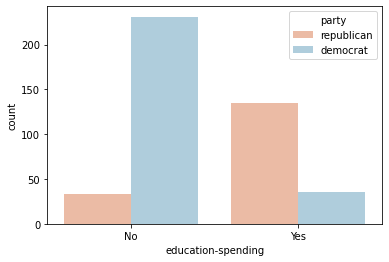

In [23]:
sns.countplot(x='education-spending', hue='party', data=new_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

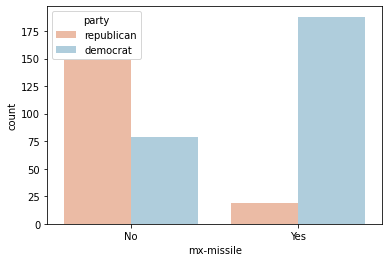

In [24]:
sns.countplot(x='mx-missile', hue='party', data=new_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

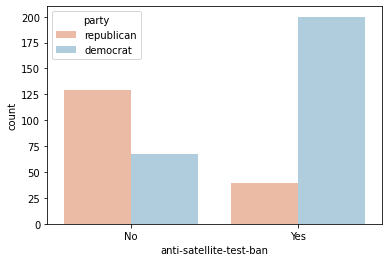

In [25]:
sns.countplot(x='anti-satellite-test-ban', hue='party', data=new_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()